In [3]:
############
# Packages #
############
import os
import time as t
import datetime as dt
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.io as pio
from sklearn.decomposition import PCA
from pathlib import Path
from typing import Dict, Union, List, Tuple, Any, Callable, Optional


#pio.renderers.default = "plotly_mimetype+notebook"

In [5]:
###############
# Importation #
###############
root_path = Path(os.getcwd())
data_path = root_path.joinpath("DM3","Macro1.csv")
df = pd.read_csv(data_path)

In [6]:
df = pd.read_csv("Macro1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Macro1.csv'

### data exploration

In [23]:
def df_nan_percent(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule le pourcentage de valeurs manquantes dans chaque colonne d'un DataFrame.

    Args:
        df (pd.DataFrame): DataFrame contenant les données.

    Returns:
        pd.DataFrame: DataFrame contenant le pourcentage de valeurs manquantes pour chaque colonne.
    """
    part_nan = df.isnull().mean()
    perc_nan = pd.DataFrame(np.round(100 * part_nan.to_numpy(), 1))
    perc_nan.index = part_nan.index
    return perc_nan

def describ_raw_df(df):
    print("\n---------Shape------------------\n", df.shape)
    print("\n---------Types------------------\n", df.dtypes.tolist())
    print("\n--------- 1 row-----------------\n", df.iloc[0, :].tolist())
    print("\n---------describe---------------\n", df.describe())
    print("\n---------nan percentage---------\n", df_nan_percent(df))
    for col in df:
        unique_val = df[col].explode().unique().tolist()
        if len(unique_val) < 20:
            print(f"\n---------{col} values----------")
            print(unique_val)

In [24]:
print(df.columns.tolist())

['sasdate', 'RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO', 'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD', 'IPNCONGD', 'IPBUSEQ', 'IPMAT', 'IPDMAT', 'IPNMAT', 'IPMANSICS', 'IPB51222S', 'IPFUELS', 'CUMFNS', 'CLF16OV', 'CE16OV', 'UNRATE', 'UEMPMEAN', 'UEMPLT5', 'UEMP5TO14', 'UEMP15OV', 'UEMP15T26', 'UEMP27OV', 'CLAIMSx', 'PAYEMS', 'USGOOD', 'CES1021000001', 'USCONS', 'MANEMP', 'DMANEMP', 'NDMANEMP', 'SRVPRD', 'USTPU', 'USWTRADE', 'USTRADE', 'USFIRE', 'USGOVT', 'CES0600000007', 'AWOTMAN', 'AWHMAN', 'HOUST', 'HOUSTNE', 'HOUSTMW', 'HOUSTS', 'HOUSTW', 'PERMIT', 'PERMITNE', 'PERMITMW', 'PERMITS', 'PERMITW', 'ACOGNO', 'AMDMNOx', 'ANDENOx', 'AMDMUOx', 'BUSINVx', 'ISRATIOx', 'M1SL', 'M2SL', 'M2REAL', 'AMBSL', 'TOTRESNS', 'NONBORRES', 'BUSLOANS', 'REALLN', 'NONREVSL', 'CONSPI', 'S&P 500', 'S&P: indust', 'S&P div yield', 'S&P PE ratio', 'FEDFUNDS', 'CP3Mx', 'TB3MS', 'TB6MS', 'GS1', 'GS5', 'GS10', 'AAA', 'BAA', 'COMPAPFFx', 'TB3SMFFM', 'TB6SMFFM', 'T1YFFM', 'T5YFFM', 'T10YFFM',

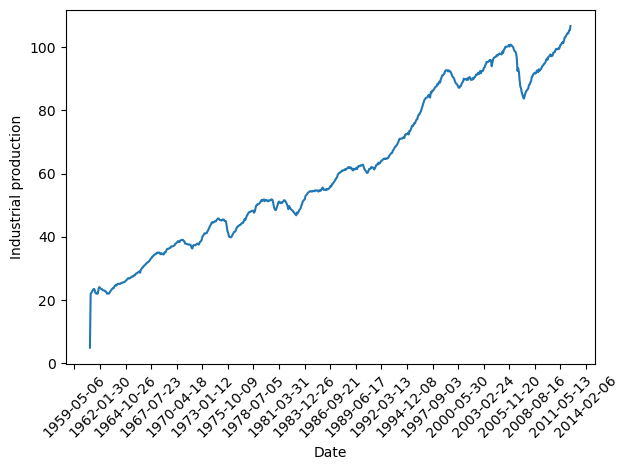

In [88]:
#Representation of industrial production we want to forecast
date_1 = dt.datetime( 1961, 1, 1) 
date_2 = dt.datetime( 2014, 1, 11) 
time_delta = dt.timedelta(days = 28) 
days = mdates.drange(date_1,date_2,time_delta)
days = days[0:672]
fig, ax = plt.subplots() 
ax.plot(days,df["INDPRO"])
plt.xlabel("Date")
plt.ylabel("Industrial production")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1000))
ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()

plt.show()

In [25]:
describ_raw_df(df)


---------Shape------------------
 (672, 127)

---------Types------------------
 [dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype(

#### PCA 

In [87]:
#We run a PCA on the predictors in order to reduce the number of features

#Drop of industrial production the variable we want to forecast
df2 = df.drop("INDPRO",axis = 1)
df2 = df2.dropna(axis = 1)
#Transformation in numpy array

df2array = np.array(df2)

#PCA 

pca = PCA(n_components=10)

result = pca.fit_transform(df2array)

top_features_per_pc = []

#Printing of features that explained the variance the most the dispersion 

top_features = np.abs(pca.components_[1]).argsort()[-5:][::-1]  
top_features_names = df2.columns[top_features]

print(top_features_names)


Index(['AMDMUOx', 'NONBORRES', 'RETAILx', 'AMDMNOx', 'CLF16OV'], dtype='object')


#### Drop convertion artefacts

In [26]:
df.drop('sasdate', axis=1, inplace=True)

#### Select a subset of features based on correlation 

In [27]:
matrice_correlation = df.iloc[:,1:].corr()

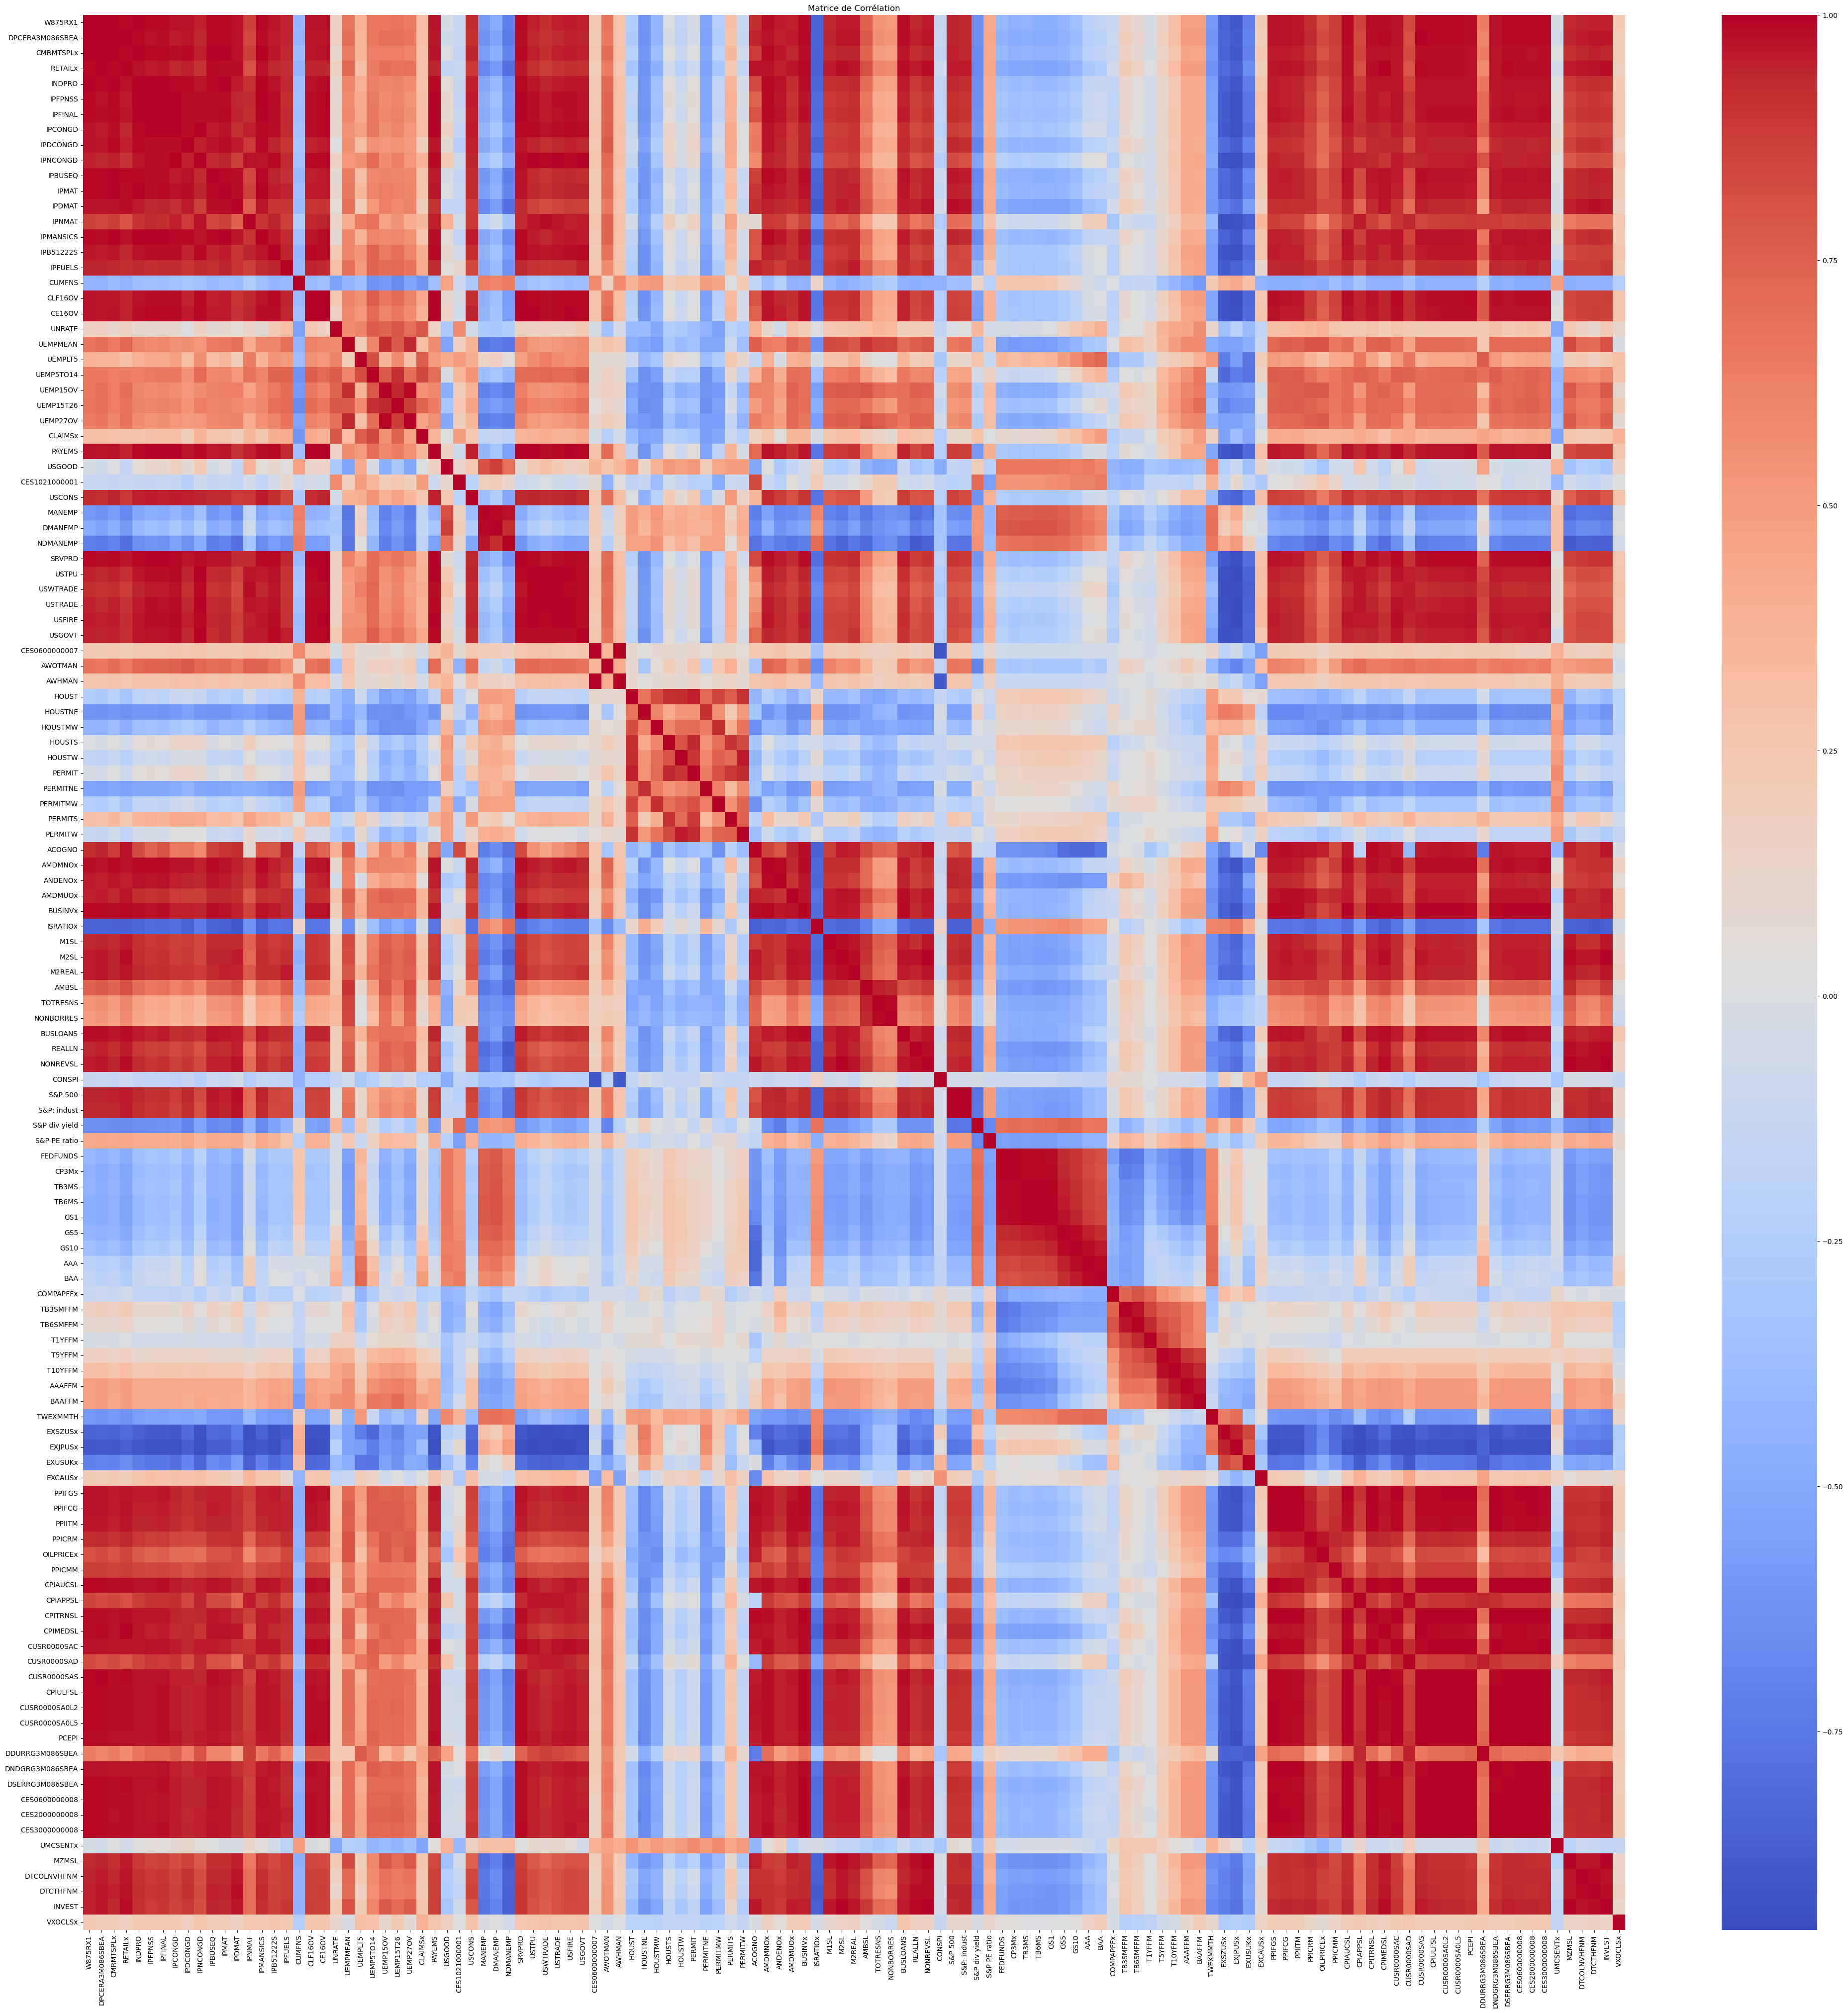

In [28]:
plt.figure(figsize=(50, 50))
sns.heatmap(matrice_correlation, annot=False, cmap="coolwarm", 
            # fmt=".2f"
           )
plt.title("Matrice de Corrélation")
plt.show()

## Data analysis for feature selection: select xt, ut and yt

Test

In [29]:
yt = df["S&P 500"]
xt = df[["OILPRICEx", "USGOVT", "INVEST"]]
ut = df[["AAA", "AAAFFM"]]

### Gibbs sampler (DM2)

In [58]:
#Initialization of parameters (code DM2)

def compute_U(T, l):
    """Compute matrix of ut observations

    Args:
        T (int): number of observations
        l (int): number of ut predictors

    Returns:
        int: 0
    """
    if l==0:
        return 0
    else:
        pass
        
def compute_vx(X):
    """Compute mean estimated variance of xt predictors

    Args:
        X (np.array): matrix of xt predictors

    Returns:
        float: mean estimated variance of xt predictors
    """
    return np.mean(np.var(X,axis=0))

def sample_beta(k, s, seed=None):
    """Sample of beta vector of dimensions 1*k

    Args:
        k (int): number of predictors
        s (int): number of non-zero elements of beta
        seed (int, optional): random seed

    Returns:
        np.array: dimensions 1*k
    """
    if seed is not None:
        np.random.seed(seed=seed)
    beta=np.zeros(k)
    index_normal_distribution=np.random.choice(len(beta), size=s, replace=False)
    beta[index_normal_distribution] = np.random.normal(loc=0, scale=1, size=s)
    return beta

def sample_phi(l):
    """Sample phi prior

    Args:
        l (int): number of ut predictors

    Returns:
        int or np.array: phi samples
    """
    if l==0:
        return 0
    else:
        return np.random.uniform(0,1, size=l)

def compute_Z(beta):
    """Compute z_1,...,z_k

    Args:
        beta (np.array): random vector beta

    Returns:
        np.array: dimensions1*k
    """
    Z=beta
    Z[Z!=0]=1
    return Z

def compute_sigma2(Ry, beta, X):
    """ Compute sigma2
    Args:
        Ry (float): pourcentage of explained variance
        beta (np.array): random vector beta
        X (np.array): matrix of xt predictors

    Returns:
        float: dimensions 1*1
    """
    return (1/Ry-1)*np.mean(np.square(X @ beta))

def sample_R2(A,B, seed=None):
    """Sample R^2 according to a beta distribution

    Args:
        A (float): shape parameter
        B (float): shape parameter
        seed (int, optional): random seed

    Returns:
        float: R^2 random variable
    """
    if seed is not None:
        np.random.seed(seed=seed)

    return np.random.beta(A,B)

def sample_q(a,b, seed=None):
    """Sample q according to a beta distribution

    Args:
        a (float): shape parameter
        b (float): shape parameter
        seed (int, optional): random seed
    Returns:
        float: q random variable
    """
    if seed is not None:
        np.random.seed(seed=seed)

    return np.random.beta(a,b)

#@jit(nopython=True)
def compute_gamma2(R2, q, k, vx):
    """Compute gamma^2 by inverting the R^2 function

    Args:
        R2 (float): R^2 random variable
        q (float): q random variable
        k (int): number of xt predictors
        vx (float): mean estimated variance of xt predictors

    Returns:
        float: gamma^2 random variable
    """
    return R2/((1-R2)*q*k*vx)

def sample_epsilon(T, sigma2, seed=None):
    """Sample epsilon_1,...,epsilon_T

    Args:
        T (int): number of observations
        sigma2 (float): sigma2 previously sampled
        seed (int, optional): random seed

    Returns:
        np.array: dimensions 1*T
    """
    if seed is not None:
        np.random.seed(seed=seed)
        
    return np.random.normal(loc=0, scale=sigma2, size=T)

def compute_Y(X, beta, epsilon):
    """Compute y_1,...,y_T

    Args:
        X (np.array): matrix of xt predictors
        beta (np.array): random vector beta
        epsilon (np.array): vector of epsilon_1,...,epsilon_T

    Returns:
        np.array: dimensions 1*T
    """
    return X@beta + epsilon


### Final function
def init_parameters(T, k, l, rho, s, Ry, a, b, A, B, standardized_X, seed=None):
    """
    Initialize parameters for a given simulation.

    Args:
        seed (int): Seed for reproducibility.
        T (int): Number of observations.
        k (int): Number of covariates.
        l (int): Number of latent variables.
        rho (float): Correlation parameter.
        s (float): Scaling parameter.
        Ry (float): Response variance.
        a (float): Shape parameter for gamma2.
        b (float): Shape parameter for gamma2.
        A (float): Shape parameter for q.
        B (float): Shape parameter for q.
        seed (int, optional): random seed.

    Returns:
        dict: Dictionary containing initialized parameters.
    """
    X=compute_X(T=T, k=k, rho=rho)
    if standardized_X:
        X = (X-np.mean(X, axis=0))/np.std(X, axis=0)

    dct = {
        "X" : X,
        "U": compute_U(T=T, l=l),
        "beta": sample_beta(k=k, s=s, seed=seed),
        "phi": sample_phi(l=l),
        "q": sample_q(a,b, seed=seed)
    }
    dct["R2"] = sample_R2(A,B, seed=seed)
    dct["gamma2"]=compute_gamma2(R2=dct["R2"], q=dct["q"], k=k, vx=compute_vx(dct["X"]))
    dct["Z"]=compute_Z(beta=dct["beta"])
    dct["sigma2"] = compute_sigma2(Ry=Ry, beta=dct["beta"], X=dct["X"])
    dct["epsilon"] = sample_epsilon(T=T, sigma2=dct["sigma2"], seed=seed)
    dct["Y"]=compute_Y(X=dct["X"], beta=dct["beta"], epsilon=dct["epsilon"])
    return dct

In [63]:
#Variable we want to predict
Y = np.array(df["INDPRO"])

#Predictors with 2 predictors to begin

X = np.array(df["W875RX1"],df["RETAILx"])



array([5.00000e+00, 2.15190e+03, 2.16020e+03, 2.17610e+03, 2.19030e+03,
       2.20560e+03, 2.21250e+03, 2.21090e+03, 2.19880e+03, 2.19740e+03,
       2.20170e+03, 2.21560e+03, 2.23950e+03, 2.25230e+03, 2.25380e+03,
       2.25540e+03, 2.26340e+03, 2.26940e+03, 2.26820e+03, 2.27070e+03,
       2.26780e+03, 2.26860e+03, 2.27570e+03, 2.26160e+03, 2.24730e+03,
       2.26900e+03, 2.26940e+03, 2.28010e+03, 2.28800e+03, 2.30110e+03,
       2.32030e+03, 2.32590e+03, 2.33480e+03, 2.33990e+03, 2.36400e+03,
       2.38680e+03, 2.39920e+03, 2.39500e+03, 2.40700e+03, 2.42310e+03,
       2.43730e+03, 2.44010e+03, 2.44540e+03, 2.45560e+03, 2.45790e+03,
       2.46090e+03, 2.46780e+03, 2.48180e+03, 2.49450e+03, 2.48780e+03,
       2.49430e+03, 2.50530e+03, 2.51290e+03, 2.52250e+03, 2.53690e+03,
       2.53750e+03, 2.54720e+03, 2.56480e+03, 2.57970e+03, 2.58510e+03,
       2.60280e+03, 2.60460e+03, 2.62690e+03, 2.63870e+03, 2.65520e+03,
       2.67290e+03, 2.68390e+03, 2.69480e+03, 2.71560e+03, 2.726

In [65]:
#Computation of the R2 and q parameters

def R2_q_flatted_grid(grid: np.ndarray) -> np.ndarray:
    """
    Flatten a 2D grid of parameters (grid) into a 2D array where each row
    represents a pair of parameters (R2, q).

    Parameters:
        grid (np.ndarray): 1D array representing a 2D grid of parameters.
s
    Returns:
        np.ndarray: 2D array with two columns representing pairs of parameters (R2, q).
    """
    n_pas = len(grid)
    R_q = np.zeros((n_pas**2, 2))
    for i in range(n_pas):
        for j in range(n_pas):
            R_q[i*n_pas+j,0] = grid[i]
            R_q[i*n_pas+j,1] = grid[j]
    return R_q

def get_R2_q_grid() -> np.ndarray:
    """
    Generate a 2D grid of parameters (R2, q) with specified discretization.

    Returns:
        np.ndarray: 2D array with two columns representing pairs of parameters (R2, q).
    """
    arr0 = np.arange(0.001,0.101,0.001) # does not start at 0 because division by 0 otherwise
    arr1 = np.arange(0.11,0.91,0.01)
    arr2 = np.arange(0.901,1,0.001)
    discretization =  np.concatenate((arr0, arr1, arr2), axis=0)
    return R2_q_flatted_grid(discretization)

def get_R2_q_densities(data: np.ndarray, grid: np.ndarray) -> np.ndarray:
    """
    Calculate densities for a 2D parameter grid (R2, q) given data.

    Args:
        data (np.ndarray): Array containing the data.
        grid (np.ndarray): 2D array representing the parameter grid.

    Returns:
        np.ndarray: Array of densities corresponding to the parameter grid.
    """
    k=int(data[0,0])
    R2 = grid[:,0]
    q = grid[:,1]
    s_z = np.sum(data[2,:k]) #z
    
    log_weights = - np.prod([
        1/(1e-6 + 2*data[0,11]),#sigma2
         np.dot(data[2,k:], np.dot(np.diag(data[2,:k]), data[2,k:])) #beta z beta
        ]) * (k*data[0,7]*q*(1-R2))/(1e-8 + R2) #vx
    log_weights += (s_z+s_z/2+data[0,2]-1)*np.log(q) #a
    log_weights += (k-s_z+data[0,3]-1)*np.log(1-q) #b
    log_weights += (data[0,4]-1-s_z/2)*np.log(R2) #A
    log_weights += (s_z/2+data[0,5]-1)*np.log(1-R2)#B
    
    #stabilisation:
    log_weights -= max(log_weights)
    
    weights = np.exp(log_weights)
    return weights/weights.sum()

def get_q_density(data: np.ndarray, grid: np.ndarray) -> np.ndarray:
    """
    Calculate density for q given data.

    Args:
        data (np.ndarray): Array containing the data.
        grid (np.ndarray): 2D array representing the parameter grid.

    Returns:
        np.ndarray: Array of densities corresponding to the parameter grid.
    """
    proba_join=get_R2_q_densities(data, grid)
    vect_probas_q=[]
    for j in np.unique(grid[:,1]):  #Loop over q support
        index=np.where(grid[:,1]==j)[0]
        p_q_equal_j = np.sum(proba_join[index, ])
        vect_probas_q.append(p_q_equal_j)
    return np.array(vect_probas_q)

def sample_R2_q_post(grid: np.ndarray, data: np.ndarray, npoints: int, seed: int = None) -> np.ndarray:
    """
    Sample from the posterior distribution of R2 and q using a grid-based approach.

    Args:
        grid (np.ndarray): Grid of R2 and q values.
        data (np.ndarray): Observed data.
        npoints (int): Number of points to sample.
        seed (int, optional): random seed

    Returns:
        np.ndarray: Samples from the posterior distribution.
    """
    if seed is not None:
        np.random.seed(seed=seed)
        
    densities = get_R2_q_densities(data, grid)
    index = np.random.choice(np.arange(grid.shape[0]), npoints, p=densities)
    return grid[index,:]

In [91]:
def sample_beta_tilde_post(data: np.ndarray, n_variables: int, seed=None) -> np.ndarray:
    """
    Sample from the posterior distribution of beta tilde using the Gibbs sampling.

    Args:
        data (np.ndarray): Observed data.
        n_variables (int): Number of samples to draw.
        seed (int, optional): random seed

    Returns:
        np.ndarray: Samples from the posterior distribution of beta tilde.
    """
    if seed is not None:
        np.random.seed(seed)
        
    k=int(data[0,0])
    X_tilde_t, W_tilde = compute_X_and_W_tilde(data[2,:k], data)
    
    return np.random.multivariate_normal(
        np.linalg.inv(W_tilde)@X_tilde_t@data[1,:], #y
        data[0,11]*np.linalg.inv(W_tilde),  #sigma2
        n_variables
    )


In [ ]:
def gibbs_sampler_joint_post(data: np.ndarray, n_iter: int, burn_in_period: int, n_iter_zi: int, debug: bool = False, seed: int = None) -> Tuple[np.ndarray, Optional[np.ndarray]]:
    """
    Gibbs sampler for the joint posterior distribution.

    Args:
        data (np.ndarray): Initial data.
        n_iter (int): Number of iterations for updating R2, q, gamma2, and sigma2.
        burn_in_period (int): number of iterations eliminated from history of samples drawn
        n_iter_zi (int): Number of iterations for updating zi.
        debug (bool, optional): If True, return additional debugging information. Defaults to False.
        seed (int, optional): random seed
        
    Returns:
        Tuple[np.ndarray, Optional[np.ndarray]]: Updated data and debug information (if debug=True).
    """
    if seed is not None:
        np.random.seed(seed=seed)
    data1 = data.copy()
    R2_q_grid = get_R2_q_grid()
    k = int(data1[0,0])
    vx = data1[0,7]
    if debug:
        accu = {"R2 post": [], "q post": [], "sigma2 post": [], "beta post": []}
    
    for step in range(n_iter):
        if debug:
            if step>=burn_in_period:
                accu["R2 post"].append(data1[0,8].copy())
                accu["q post"].append(data1[0,9].copy())
                accu["sigma2 post"].append(data1[0,11].copy())
        
        data1[0,8:10] = sample_R2_q_post(R2_q_grid, data1, 1) # update R2, q
        data1[0,10] = compute_gamma2(data1[0,8], data1[0,9], k, vx) # update gamma2
        data1 = gibbs_z(data1, n_iter_zi) #update z
        data1[0,11] = sample_sigma2_post(data1, 1) #update sigma2
        non_zero_z=np.nonzero(data1[2,:k])[0]
        if non_zero_z.shape[0]>0:
            beta_tilde = sample_beta_tilde_post(data1, 1)
            data1[2,non_zero_z] = beta_tilde  #update beta tilde
            if debug:
                if step>=burn_in_period:
                    accu["beta post"].append(beta_tilde.copy())
    if debug:
        return data1, accu
    return data1, None

### Application to our model

In [90]:
#Variable we want to forecast

Y = np.array(df["INDPRO"])

#Predictors selected by the ACP

X = np.array(df[['AMDMUOx', 'NONBORRES', 'RETAILx', 'AMDMNOx', 'CLF16OV']])
